In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from AutoEncoderCNN import AE_CNN
from GridSearch import GridSearch

from util.custom_loss.custom_loss import mse_loss, sparsity_loss
from util.ImageFolderWithPaths import ImageFolderWithPaths
from util.random_patient import random_split

In [38]:
AE = AE_CNN(rand_mat_dim=3, encoded_dim=1000, rand_mat=False).to('cuda')

In [39]:
y = torch.randn(3, 1000, requires_grad=False, device='cuda' if torch.cuda.is_available() else 'cpu')
norm = torch.norm(y, dim = 0)
y = y.div(norm)
y

tensor([[-0.6474,  0.5861, -0.2099,  ...,  0.5146, -0.7139, -0.2660],
        [-0.7219,  0.4260,  0.9727,  ..., -0.6863, -0.4947,  0.8320],
        [-0.2445,  0.6892,  0.0993,  ..., -0.5139,  0.4955, -0.4869]],
       device='cuda:0')

In [42]:
for i in range(len(y[0])):
    s = 0
    for j in range(len(y)):
        s += y[j][i]**2
    assert (s ** 0.5 > 0.999 and s ** 0.5 < 1.001)

In [29]:
AE.rand_mat = y

In [30]:
AE.rand_mat.shape

torch.Size([3, 1000])

In [31]:
AE.rand_mat[0][1]

tensor(0.4247, device='cuda:0')

In [32]:
import matplotlib.pyplot as plt
import numpy as np

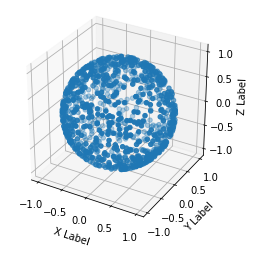

In [33]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y, z = [], [], []

for col in range(len(AE.rand_mat[0])):
    x.append(AE.rand_mat[0][col].cpu().numpy())
    y.append(AE.rand_mat[1][col].cpu().numpy())
    z.append(AE.rand_mat[2][col].cpu().numpy())
    
ax.scatter(x,y,z)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))

plt.show()

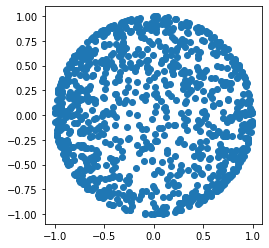

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x, z)
ax.set_aspect('equal')
plt.show()

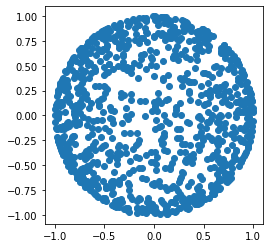

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x, y)
ax.set_aspect('equal')
plt.show()

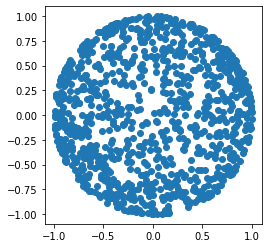

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(y, z)
ax.set_aspect('equal')
plt.show()